In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from collections import Counter 
import emoji
from urlextract import URLExtract

In [2]:
f = open('WhatsApp Chat with Manthon.txt', 'r', encoding='utf-8')

In [3]:
data = f.read()
print(data)

14/12/25, 10:08 - Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more.
14/12/25, 10:08 - You created this group
14/12/25, 10:08 - Navneet 2, Shristi_242 and Shubham Kumar_110 were added
14/12/25, 11:14 - Rishabh Singh_248: Guys problem statement discuss kr lo kya banna h
14/12/25, 11:55 - Shristi_242: <Media omitted>
14/12/25, 17:56 - Navneet 2: mai eligible hu?
14/12/25, 17:59 - Rishabh Singh_248: Haa
14/12/25, 18:23 - Navneet 2: okay
16/12/25, 20:28 - Navneet 2: kal meet krte hai
16/12/25, 20:28 - Navneet 2: after 6pm
16/12/25, 20:29 - Navneet 2: share your feasible time
16/12/25, 22:10 - Shristi_242: we can do it at 8pm if you all are ok with the timing.
17/12/25, 01:46 - Rishabh Singh_248: 8pm
17/12/25, 12:09 - Navneet 2: ok
17/12/25, 20:01 - Shristi_242: https://meet.google.com/ubw-cvqy-nbs
17/12/25, 20:31 - Navneet 2 changed this group's icon
17/12/25, 20:37 - Navneet 2: rishab register kr lega toh bata dena... mere

In [4]:
pattern = r'\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'  #pattern to identify date and time in the chat
messages = re.split(pattern, data)[1:]
messages

['Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more.\n',
 'You created this group\n',
 'Navneet 2, Shristi_242 and Shubham Kumar_110 were added\n',
 'Rishabh Singh_248: Guys problem statement discuss kr lo kya banna h\n',
 'Shristi_242: <Media omitted>\n',
 'Navneet 2: mai eligible hu?\n',
 'Rishabh Singh_248: Haa\n',
 'Navneet 2: okay\n',
 'Navneet 2: kal meet krte hai\n',
 'Navneet 2: after 6pm\n',
 'Navneet 2: share your feasible time\n',
 'Shristi_242: we can do it at 8pm if you all are ok with the timing.\n',
 'Rishabh Singh_248: 8pm\n',
 'Navneet 2: ok\n',
 'Shristi_242: https://meet.google.com/ubw-cvqy-nbs\n',
 "Navneet 2 changed this group's icon\n",
 'Navneet 2: rishab register kr lega toh bata dena... mere 400 katenge :(\n',
 'Rishabh Singh_248: Per group 400😁\n',
 'Navneet 2: arey lekin tera nahi lageag\n',
 'Navneet 2: also tu sure hai na bahar wale kr skate hai sath me?\n',
 'Rishabh Singh_248: Haa\n',
 'Ri

In [5]:
print(len(messages))

141


In [6]:
dates = re.findall(pattern, data)
dates

['14/12/25, 10:08 - ',
 '14/12/25, 10:08 - ',
 '14/12/25, 10:08 - ',
 '14/12/25, 11:14 - ',
 '14/12/25, 11:55 - ',
 '14/12/25, 17:56 - ',
 '14/12/25, 17:59 - ',
 '14/12/25, 18:23 - ',
 '16/12/25, 20:28 - ',
 '16/12/25, 20:28 - ',
 '16/12/25, 20:29 - ',
 '16/12/25, 22:10 - ',
 '17/12/25, 01:46 - ',
 '17/12/25, 12:09 - ',
 '17/12/25, 20:01 - ',
 '17/12/25, 20:31 - ',
 '17/12/25, 20:37 - ',
 '17/12/25, 20:38 - ',
 '17/12/25, 20:39 - ',
 '17/12/25, 20:39 - ',
 '17/12/25, 20:41 - ',
 '18/12/25, 18:21 - ',
 '18/12/25, 18:21 - ',
 '18/12/25, 18:21 - ',
 '18/12/25, 18:33 - ',
 '19/12/25, 12:50 - ',
 '19/12/25, 12:50 - ',
 '19/12/25, 12:51 - ',
 '19/12/25, 12:51 - ',
 '19/12/25, 12:56 - ',
 '19/12/25, 13:12 - ',
 '19/12/25, 13:17 - ',
 '19/12/25, 13:18 - ',
 '19/12/25, 13:18 - ',
 '19/12/25, 13:18 - ',
 '19/12/25, 13:19 - ',
 '23/12/25, 20:17 - ',
 '23/12/25, 20:17 - ',
 '23/12/25, 20:59 - ',
 '23/12/25, 21:33 - ',
 '23/12/25, 21:33 - ',
 '23/12/25, 21:33 - ',
 '23/12/25, 21:34 - ',
 '23/12/25,

In [7]:
df = pd.DataFrame({'message_date':dates, 'user_messages':messages})
df.head()

,message_date,user_messages
0,"14/12/25, 10:08 -",Messages and calls are end-to-end encrypted. O...
1,"14/12/25, 10:08 -",You created this group\n
2,"14/12/25, 10:08 -","Navneet 2, Shristi_242 and Shubham Kumar_110 w..."
3,"14/12/25, 11:14 -",Rishabh Singh_248: Guys problem statement disc...
4,"14/12/25, 11:55 -",Shristi_242: <Media omitted>\n


In [8]:
df['message_date'] = pd.to_datetime(df['message_date'], format= '%d/%m/%y, %H:%M - ')

In [9]:
df.rename(columns={'message_date':'date'},inplace = True)
df.head(10)

,date,user_messages
0,2025-12-14 10:08:00,Messages and calls are end-to-end encrypted. O...
1,2025-12-14 10:08:00,You created this group\n
2,2025-12-14 10:08:00,"Navneet 2, Shristi_242 and Shubham Kumar_110 w..."
3,2025-12-14 11:14:00,Rishabh Singh_248: Guys problem statement disc...
4,2025-12-14 11:55:00,Shristi_242: <Media omitted>\n
5,2025-12-14 17:56:00,Navneet 2: mai eligible hu?\n
6,2025-12-14 17:59:00,Rishabh Singh_248: Haa\n
7,2025-12-14 18:23:00,Navneet 2: okay\n
8,2025-12-16 20:28:00,Navneet 2: kal meet krte hai\n
9,2025-12-16 20:28:00,Navneet 2: after 6pm\n


In [10]:
#seperating user and message
users = []
messages = []

for message in df['user_messages']:
    entry = re.split(r'([^:]+):\s', message, maxsplit=1)

    if len(entry) == 3:
        users.append(entry[1].strip())
        messages.append(entry[2].strip())
    else:
        users.append('group_notification')
        messages.append(message.strip())

df['user'] = users
df['message'] = messages

In [11]:
df.drop(columns='user_messages', inplace = True)
df.head(10)

,date,user,message
0,2025-12-14 10:08:00,group_notification,Messages and calls are end-to-end encrypted. O...
1,2025-12-14 10:08:00,group_notification,You created this group
2,2025-12-14 10:08:00,group_notification,"Navneet 2, Shristi_242 and Shubham Kumar_110 w..."
3,2025-12-14 11:14:00,Rishabh Singh_248,Guys problem statement discuss kr lo kya banna h
4,2025-12-14 11:55:00,Shristi_242,<Media omitted>
5,2025-12-14 17:56:00,Navneet 2,mai eligible hu?
6,2025-12-14 17:59:00,Rishabh Singh_248,Haa
7,2025-12-14 18:23:00,Navneet 2,okay
8,2025-12-16 20:28:00,Navneet 2,kal meet krte hai
9,2025-12-16 20:28:00,Navneet 2,after 6pm


In [12]:

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute

In [13]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2025-12-14 10:08:00,group_notification,Messages and calls are end-to-end encrypted. O...,2025,December,14,10,8
1,2025-12-14 10:08:00,group_notification,You created this group,2025,December,14,10,8
2,2025-12-14 10:08:00,group_notification,"Navneet 2, Shristi_242 and Shubham Kumar_110 w...",2025,December,14,10,8
3,2025-12-14 11:14:00,Rishabh Singh_248,Guys problem statement discuss kr lo kya banna h,2025,December,14,11,14
4,2025-12-14 11:55:00,Shristi_242,<Media omitted>,2025,December,14,11,55


In [14]:
extractor = URLExtract()
links =[]

for message in df['message']:
    link = extractor.find_urls(message)
    if len(link):
        links.append(link)
links        

[['https://meet.google.com/ubw-cvqy-nbs'],
 ['https://meet.google.com/sfh-rtjt-rii'],
 ['https://www.canva.com/brand/join?token=ifJO_-C7sINoc8lyRJgbeQ&brandingVariant=edu&referrer=team-invite'],
 ['https://www.canva.com/design/DAG8mdr_a84/MyZBt4xPj1DwjWh3IpTgwg/edit?utm_content=DAG8mdr_a84&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton'],
 ['https://github.com/0904-mansi/Deepfake_detection_using_deep_learning'],
 ['https://baselayer.com/?ref=saaspo.com'],
 ['https://www.clutch.security/?ref=saaspo.com'],
 ['https://deepshield-51mi0hga4-shristi15.vercel.app/'],
 ['https://deepshield-git-main-shristi15.vercel.app?_vercel_share=DZoRsbBAOJSvaTusZuz5DmjrRRrTrudG']]

In [15]:
x = df['user'].value_counts().head()

In [16]:
name = x.index
count = x.values

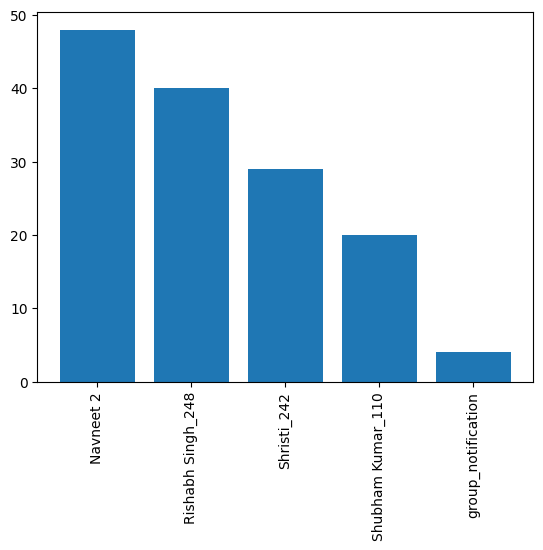

In [17]:
plt.bar(name, count)
plt.xticks(rotation = 'vertical')
plt.show()

In [18]:
y = round(df['user'].value_counts()/df.shape[0] * 100, 2).reset_index().rename(columns={'user' : 'name', 'count':'percentage'})
print(y)

                 name  percentage
0           Navneet 2       34.04
1   Rishabh Singh_248       28.37
2         Shristi_242       20.57
3   Shubham Kumar_110       14.18
4  group_notification        2.84


In [19]:
#removing stop words from message
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\rishabh
[nltk_data]     singh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [20]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    return [w for w in words if w not in stop_words]

temp = df[df['user'] != 'group_notification']
temp = temp[temp['message'] != '<Media omitted>']

clean_message = temp['message'].apply(remove_stopwords)
all_words = [word for words in clean_message for word in words]
all_words


['guys',
 'problem',
 'statement',
 'discuss',
 'kr',
 'lo',
 'kya',
 'banna',
 'h',
 'mai',
 'eligible',
 'hu',
 'haa',
 'okay',
 'kal',
 'meet',
 'krte',
 'hai',
 'pm',
 'share',
 'feasible',
 'time',
 'pm',
 'ok',
 'timing',
 'pm',
 'ok',
 'httpsmeetgooglecomubwcvqynbs',
 'rishab',
 'register',
 'kr',
 'lega',
 'toh',
 'bata',
 'dena',
 'mere',
 'katenge',
 'per',
 'group',
 'arey',
 'lekin',
 'tera',
 'nahi',
 'lageag',
 'also',
 'tu',
 'sure',
 'hai',
 'na',
 'bahar',
 'wale',
 'kr',
 'skate',
 'hai',
 'sath',
 'haa',
 'gmail',
 'bhej',
 'sabhi',
 'navneetsharmagmailcom',
 'shubhamkumarshuklagmailcom',
 'kshristigmailcom',
 'guys',
 'humare',
 'team',
 'ka',
 'naam',
 'kya',
 'rhega',
 'project',
 'se',
 'decide',
 'krenge',
 'register',
 'kr',
 'rha',
 'tha',
 'batana',
 'h',
 'batao',
 'batao',
 'baki',
 'log',
 'bug',
 'smashers',
 'neural',
 'ninjas',
 'fantastic',
 'four',
 'deepfake',
 'detectives',
 'yeh',
 'kuch',
 'naam',
 'mujhe',
 'sahi',
 'lage',
 'tumlog',
 'apne',
 '

In [21]:
Counter(all_words).most_common(20)

[('storage', 20),
 ('h', 19),
 ('results', 18),
 ('hai', 17),
 ('models', 15),
 ('gcp', 15),
 ('kya', 14),
 ('supabase', 13),
 ('user', 13),
 ('detection', 13),
 ('fastapi', 12),
 ('upload', 12),
 ('show', 10),
 ('ml', 10),
 ('file', 10),
 ('kr', 9),
 ('heatmap', 9),
 ('api', 9),
 ('score', 9),
 ('video', 8)]

In [22]:
emojis = []

for message in df['message']:
    if isinstance(message, str):   
        emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

emojis    

['😁', '🥷', '😁', '😁', '😂', '😂', '😭', '😭', '😭', '😁', '🤷', '♀']

In [23]:
pd.DataFrame(Counter(emojis).most_common(5))

,0,1
0,😁,4
1,😭,3
2,😂,2
3,🥷,1
4,🤷,1


In [24]:
df['month_num'] = df['date'].dt.month
df.head()

,date,user,message,year,month,day,hour,minute,month_num
0,2025-12-14 10:08:00,group_notification,Messages and calls are end-to-end encrypted. O...,2025,December,14,10,8,12
1,2025-12-14 10:08:00,group_notification,You created this group,2025,December,14,10,8,12
2,2025-12-14 10:08:00,group_notification,"Navneet 2, Shristi_242 and Shubham Kumar_110 w...",2025,December,14,10,8,12
3,2025-12-14 11:14:00,Rishabh Singh_248,Guys problem statement discuss kr lo kya banna h,2025,December,14,11,14,12
4,2025-12-14 11:55:00,Shristi_242,<Media omitted>,2025,December,14,11,55,12


In [25]:
timeLine = df.groupby(['year', 'month_num', 'month']).count()['message'].reset_index()
timeLine

,year,month_num,month,message
0,2025,12,December,141


In [26]:
time = []

for i in range(timeLine.shape[0]):
    time.append(timeLine['month'][i] + '-' + str(timeLine['year'][i]))

timeLine['time'] = time 
timeLine   

,year,month_num,month,message,time
0,2025,12,December,141,December-2025


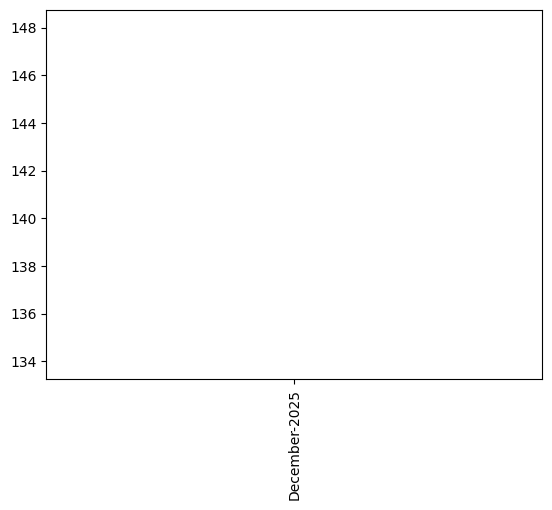

In [27]:
plt.plot(timeLine['time'], timeLine['message'])
plt.xticks(rotation='vertical')
plt.show()

In [28]:
df['day_name'] = df['date'].dt.day_name()
df['day_name'].value_counts()

day_name
Saturday     34
Wednesday    32
Tuesday      29
Friday       20
Sunday       11
Monday       11
Thursday      4
Name: count, dtype: int64

In [29]:
period = []

for hour in df[['day_name', 'hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour + 1))
    else:
        period.append(str(hour) + "-" + str(hour + 1))

df['period'] = period

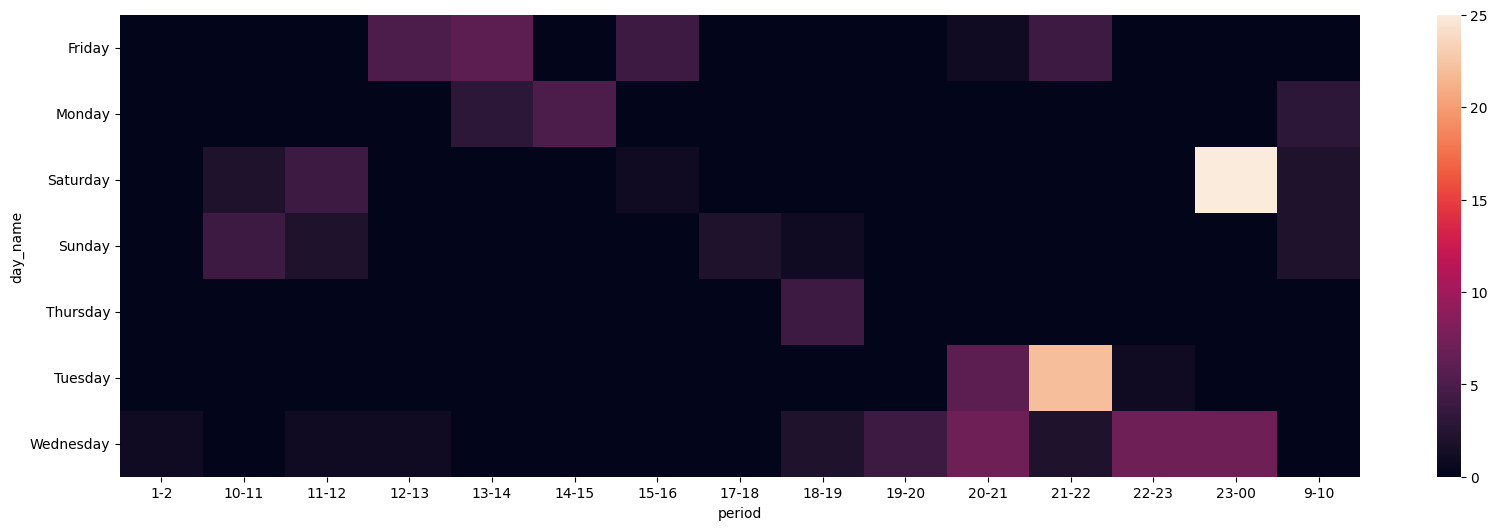

In [30]:
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name', columns='period', values='message', aggfunc='count').fillna(0))
plt.yticks(rotation="horizontal")
plt.show()

In [31]:
# finding similarity between messages
# df.head()

temp = temp[(~temp['message'].str.contains('deleted', case= False, na = False))&(~temp['message'].str.contains(r'https+', regex=True, na=False))]

temp.head()

texts = temp.groupby('user')['message'].apply(' '.join).to_dict()
list(texts.items())[:2]

[('Navneet 2',
  'mai eligible hu? okay kal meet krte hai after 6pm share your feasible time ok rishab register kr lega toh bata dena... mere 400 katenge :( arey lekin tera nahi lageag also tu sure hai na bahar wale kr skate hai sath me? navneetsharma2302@gmail.com project se decide krenge batao batao baki log 2nd 🥷 @\u2068Rishabh Singh_248\u2069 ? dost rishabh kuch nahi bhai  sek le kafi thand hai aaj kal arey bana lenge tu aag sek le 😂😂 yaar ai se aab nafrat si hone lagi hai aisa lag raha hai jeeni bhai baan gaya hai aaj kal insan se zada isi se puch raha hu sara question bhai bade hoke iss saab chiz ko baand krenge 😭😭😭 कॉस्ट जीरो आएगी वैसे तो लेकिन आइडिया अच्छा है @\u2068Rishabh Singh_248\u2069  koi format mila hai ppt ka? abstraction toh badhiya hai yes ye LaTeX me kyun hai? koi google cloud ka 300usd claim krlo agar alt id hai toh uspe usi id pr hum docker ke container daal denge MasterCard ya visa ka debit card chiye + ek alt gmail id # Deepfake Detector - Simple & Robust Solutio

In [40]:
users = list(texts.keys())
user_text = list(texts.values())

user_text[1]

"Guys problem statement discuss kr lo kya banna h Haa 8pm Per group 400😁 Haa Gmail bhej sabhi Guys humare team ka naam kya rhega Register kr rha tha Batana h @\u2068Shubham Kumar_110\u2069 @\u2068Navneet 2\u2069 Ok Kal ek bar descuse kr lete h...kya kya Krna h(aditional) phir pdf bante h <This message was edited> Hmm Bolo Pdf ka format diya nhi h 😁😁 Tu baith ke soch kya kya Krna h mai bhi tu personal chat pe aa 8 baje meet rkhte h Chilled pani pi..😁 Nhi GUYS ek baar How it addresses the Problem page 4 dekhna cost zero kaise hoga aur tech stack me kya use krna h phir show kaise krenge ki kaun sa part suspicious h problem st me diya  h show krne eg me heat map h koi aur bhi use kr skte h 1. We don't just detects lie, we point it out\n2. We use dual stream architecture (video and audio)\n3. Metadata analysis Agr api provide krenge too vo bhi add kr skte h...like anyone can use it through api Overlief pe baana h ye dono sahi lage mujhe  @\u2068Shristi_242\u2069 Login ka doo opt .. public u

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words='english',
    min_df=2,              # ignore very rare words
    ngram_range=(1, 2),    # capture phrases
    max_features=5000
)

tfid = vectorizer.fit_transform(user_text)

In [34]:
print(tfid)
tfid.shape

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 173 stored elements and shape (4, 75)>
  Coords	Values
  (0, 39)	0.0439637348027281
  (0, 29)	0.13189120440818428
  (0, 40)	0.0439637348027281
  (0, 22)	0.483601082830009
  (0, 45)	0.035592432289839104
  (0, 55)	0.0439637348027281
  (0, 32)	0.07118486457967821
  (0, 1)	0.0439637348027281
  (0, 69)	0.0879274696054562
  (0, 20)	0.058198291200729016
  (0, 11)	0.035592432289839104
  (0, 60)	0.1758549392109124
  (0, 34)	0.0879274696054562
  (0, 9)	0.0879274696054562
  (0, 0)	0.0439637348027281
  (0, 35)	0.0439637348027281
  (0, 26)	0.0439637348027281
  (0, 31)	0.0879274696054562
  (0, 19)	0.10677729686951731
  (0, 49)	0.07118486457967821
  (0, 28)	0.10677729686951731
  (0, 74)	0.0439637348027281
  (0, 25)	0.1758549392109124
  (0, 30)	0.0439637348027281
  (0, 17)	0.0439637348027281
  :	:
  (3, 22)	0.6892340201918482
  (3, 32)	0.18599811341179695
  (3, 20)	0.07603282264455011
  (3, 11)	0.09299905670589848
  (3, 60)	0.11487233669864

(4, 75)

In [35]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tfid)

print(similarity_matrix)

[[1.         0.34507771 0.20171947 0.46743663]
 [0.34507771 1.         0.48994145 0.34945289]
 [0.20171947 0.48994145 1.         0.34171477]
 [0.46743663 0.34945289 0.34171477 1.        ]]


In [36]:
similarity_df = pd.DataFrame(
    similarity_matrix,
    index= users,
    columns=users
)

similarity_df.head()

,Navneet 2,Rishabh Singh_248,Shristi_242,Shubham Kumar_110
Navneet 2,1.000000,0.345078,0.201719,0.467437
Rishabh Singh_248,0.345078,1.000000,0.489941,0.349453
Shristi_242,0.201719,0.489941,1.000000,0.341715
Shubham Kumar_110,0.467437,0.349453,0.341715,1.000000


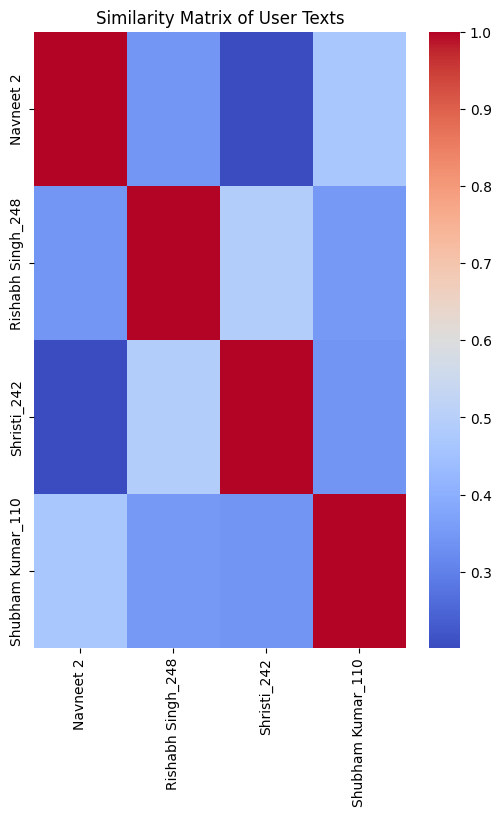

In [37]:
#show similarity through heatmap
plt.figure(figsize=(6,8))
sns.heatmap(similarity_df, cmap='coolwarm', annot=False)
plt.title("Similarity Matrix of User Texts")
plt.show()